### Exatrapolation

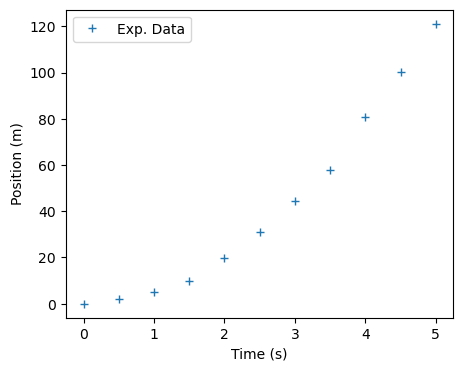

In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt


# Get data into data frame
df_1 = pd.read_csv("/home/jdiego/Documents/Computacional_1/data_freefall.csv", sep = ",")

# Read in the columns
time = np.array(df_1["Time (s)"])
position = np.array(df_1["Position (m)"])

# Inspect data
#print(df_1)

# Create a figure environment

fig = plt.figure(figsize = (5,4))

plt.plot(time, position, linestyle = " ", marker = "+", label = "Exp. Data")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plt.legend()

plt.show()

### Usin regression to do the extrapolation

In [3]:
import scipy.optimize as opt
# Define the model function to fit the data

def fit_model(t_values, a):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: t_values (data vector)
    Output: y_values (linear finction)
    """
    y_values = a * t_values**2
    
    return y_values
# Call the curve_fit() function
coef, cova = opt.curve_fit(fit_model, time, position)

print(coef)

[4.90275925]


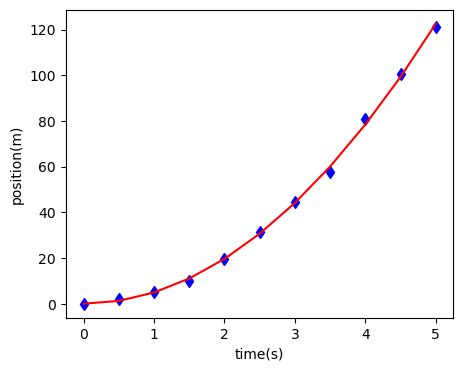

In [4]:
# Evaluate the model

position_fit = fit_model(time, coef[0])
# And now we plot
fig, ax = plt.subplots(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(time,position_fit,color='red', linestyle="-", label="Fit")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.show()

In [12]:
# Informed extrpolation

#extrapolation data to t=10s\
time_ext = 10
position_ext = fit_model(time_ext,coef[0])

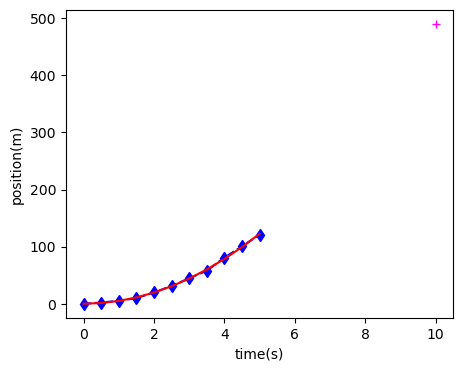

In [29]:
position_fit = fit_model(time, coef[0])
# And now we plot
fig, ax = plt.subplots(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle="--", label="Original data")
plt.plot(time,position_fit,color='red', linestyle="-", label="Fit")
plt.plot(time_ext,position_ext,color = "magenta", marker = "+", linestyle=" ", label="Extrapolated")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.show()

### Using interpolation method (not physical)

In [14]:
from scipy.interpolate import lagrange

In [31]:
f_lag = lagrange(time,position)

time_new = np.linspace(0,5,num=101 ,endpoint = True )

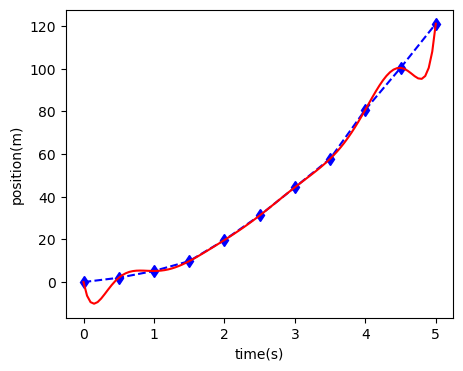

In [32]:
# And now we plot
fig, ax = plt.subplots(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle="--", label="Original data")
plt.plot(time_new,f_lag(time_new),color='red', linestyle="-", label="Fit")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.show()

Text(0, 0.5, 'position(m)')

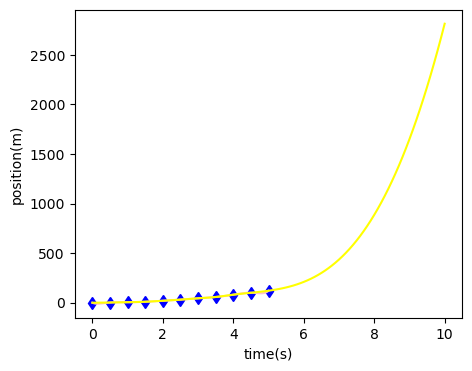

In [33]:
from scipy.interpolate import InterpolatedUnivariateSpline
# Call function:
ext_data = InterpolatedUnivariateSpline(time,position, k=3)

# New axis:
time_new2 = np.linspace(0, 10, num=101, endpoint=True)

# Evaluate our extrapolated function using the new axis:
position_ext2 = ext_data(time_new2)
# And now we plot
fig, ax = plt.subplots(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(time_new, f_lag(time_new),color='pink', linestyle="-", label="Interp")
plt.plot(time_new2, position_ext2, color='yellow', linestyle="-", label="Fit")

plt.xlabel('time(s)')
plt.ylabel('position(m)')
